# Libs

In [1]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import numpy as np

import os
import re
import sys

import seaborn as sns

import pickle
 
from collections import defaultdict
    
sys.path.append("/home/charles/Projects/BarycentersAgePyramid/Python")
sys.path.append("/home/dhw3172/projects/barycenterAgePyramid/Python")

from scipy.spatial.distance import sqeuclidean

from WassAge import *

from pathlib import Path

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Params

In [2]:
DATA_PATH = Path("." ) / ".." / ".." / "Data" 

# Quebec vs Montreal - wasserstein barycenter

## Quebec

In [3]:
## Load back the city-wide wass barycenter
subsetRows= 879
city="Quebec City"
with open(Path(".") /".." / ".." / "Data" / "Numpy" / f"cityWideDAWassBarycenter_{subsetRows}_{city}.pickle", "rb") as f:
    bary_wass=pickle.load( f )

In [4]:
wassBaryGlobalQc = pd.DataFrame(bary_wass, index=LIST_AGE_COLS)
wassBaryGlobalQc.head()

0
0_4    0.040816
5_9    0.038131
10_14  0.044130
15_19  0.054701
20_24  0.062222

In [5]:
dfQcEuc = wassBaryGlobalQc
dfQcEuc["City"] = [city] * dfQcEuc.shape[0]

## Montreal

In [6]:
## Load back the city-wide wass barycenter
subsetRows= 900
city="Montreal"
with open(Path(".") /".." / ".." / "Data" / "Numpy" / f"cityWideDAWassBarycenter_{subsetRows}_{city}.pickle", "rb") as f:
    bary_wass=pickle.load( f )

In [7]:
wassBaryGlobalMtl = pd.DataFrame(bary_wass, index=LIST_AGE_COLS)
wassBaryGlobalQc.head()

0         City
0_4    0.040816  Quebec City
5_9    0.038131  Quebec City
10_14  0.044130  Quebec City
15_19  0.054701  Quebec City
20_24  0.062222  Quebec City

In [8]:
dfMtlEuc = wassBaryGlobalMtl
dfMtlEuc["City"] = [city] * dfMtlEuc.shape[0]

In [9]:
dfConcat= dfQcEuc.append(dfMtlEuc)
dfConcat.rename(columns={0:"value"}, inplace=True)
dfConcat["City"]=dfConcat["City"].astype("category")

In [10]:
mtlIdx = dfConcat["City"] == "Montreal"
dfConcat.loc[ mtlIdx ].head()

value      City
0_4    0.057851  Montreal
5_9    0.052201  Montreal
10_14  0.052288  Montreal
15_19  0.057171  Montreal
20_24  0.063717  Montreal

In [11]:
dfConcat.loc[ ~mtlIdx ].head()

value         City
0_4    0.040816  Quebec City
5_9    0.038131  Quebec City
10_14  0.044130  Quebec City
15_19  0.054701  Quebec City
20_24  0.062222  Quebec City

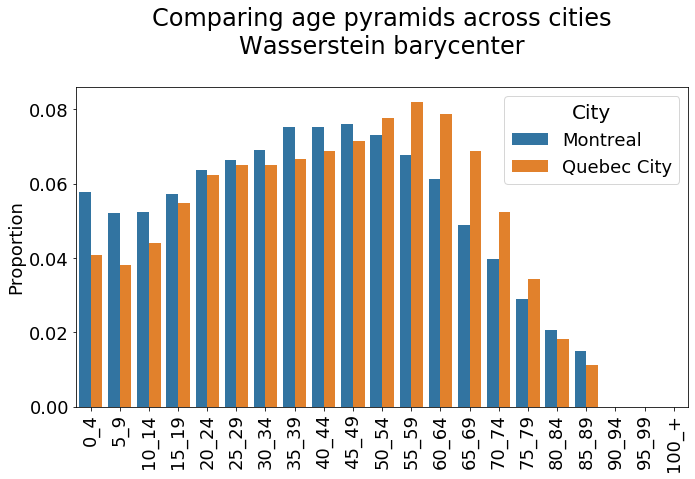

In [17]:
rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18, 'axes.titlesize': 24 }

sns.set_context(rc=rc)

fig=plt.figure(figsize=(10,7))
ax = sns.barplot( dfConcat.index, y=dfConcat["value"] , hue=dfConcat["City"] )
_ = ax.set_xticklabels(labels = ax.get_xticklabels()  , rotation = 90)
_ = ax.set_title("Comparing age pyramids across cities\nWasserstein barycenter\n") #, fontsize=20)
_ = ax.set(ylabel="Proportion", label="big")

_  = plt.setp(ax.get_legend().get_title(), fontsize='20') 

plt.tight_layout(rect=(0,0,1,1))

fig.savefig( Path(DATA_PATH) /".."/ "Figures" / "CityComparison" / f"wassAgePyramidsQcMtl.png")